#TensorFlow
- TensorFlow means flow of tensors
- tensors means n-d array
- they travel through the Computational graph
- where node = mathemtical opertions and edges= tensors

In [ ]:
import tensorflow as tf
print("TensorFlow version: ", tf.__version__)

TensorFlow version:  2.17.0


In [ ]:
# Hello world in TF
with tf.compat.v1.Session() as sess:
  hello = tf.constant("Hello, TensorFlow!")
  print(sess.run(hello))
sess.close()

b'Hello, TensorFlow!'


In [ ]:
a = tf.constant(10)
b = tf.constant(32)
print(a+b)


tf.Tensor(42, shape=(), dtype=int32)



- [12,3] = a
- a -> b and c
- b multipies a i.e. 12x3=36
- c sums a i.e. 12+3=15
- final add both a i.e. 36+15 = 51

In [ ]:
with tf.compat.v1.Session() as sess:
  a = tf.constant([12,3], name = 'input_a') # Define a tensor
  b = tf.reduce_prod(a, name = 'prod_b') # Define a prod node
  c = tf.reduce_sum(a, name = 'sum_c') # Define a sum node
  final = tf.add(b,c, name = 'add_d') # Returns x+y element-wise

  # runing the graph
  sess = tf.compat.v1.Session()
  output = sess.run(final)

print(output)
  # close the session
sess.close()


51


tf ml model with keras api

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the images to values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print(f'Training data shape: {x_train.shape}, Labels shape: {y_train.shape}')
print(f'Test data shape: {x_test.shape}, Labels shape: {y_test.shape}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28), Labels shape: (60000,)
Test data shape: (10000, 28, 28), Labels shape: (10000,)


In [ ]:
# Build the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the input images
    keras.layers.Dense(128, activation='relu'),   # Hidden layer with ReLU activation
    keras.layers.Dropout(0.2),                    # Dropout layer to prevent overfitting
    keras.layers.Dense(10, activation='softmax')   # Output layer with softmax activation for classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Train the model
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8665 - loss: 0.4700
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9558 - loss: 0.1489
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9681 - loss: 0.1098
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9727 - loss: 0.0867
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9769 - loss: 0.0710


In [ ]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9707 - loss: 0.0914

Test accuracy: 0.9770


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


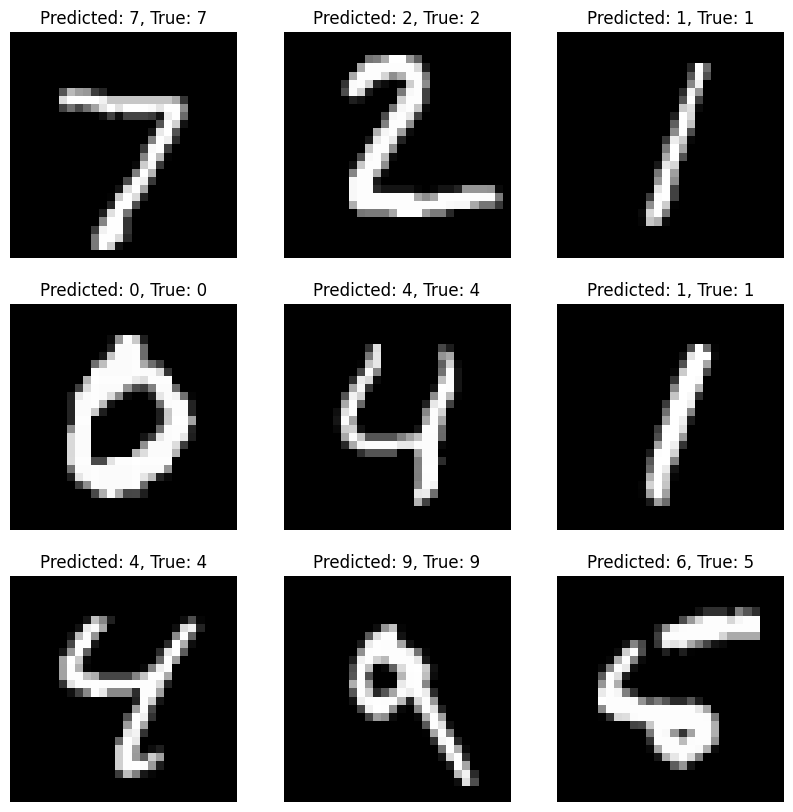

In [ ]:
# Make predictions on test data
predictions = model.predict(x_test)

# Display some predictions along with their corresponding images and true labels
def display_predictions(images, predictions, true_labels):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'Predicted: {np.argmax(predictions[i])}, True: {true_labels[i]}')
        plt.axis('off')
    plt.show()

display_predictions(x_test[:9], predictions[:9], y_test[:9])

In [ ]:
!pip install openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.7/383.7 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.2/325.2 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.1 MB/s eta 0:00:00


In [ ]:
import openai

openai.api_key = 'sk-DrhjwIlU7yQEbQQGapOlV23XLCEyDRPxCvSGjam0-kT3BlbkFJxftNWp33QSGSSxQYGaHv3cgOJQTeqhcolGffaZyoYA'

def chat_with_gpt(prompt):
    response = openai.Completion.create(
        model='gpt-3.5-turbo',
        # engine="text-davinci-002",
        messages= [{"role": "user", "content": prompt}],
        max_tokens=50
    )
    return response.choices[0].text.strip()

    if __name__ == "__main__":
      while(True):
        print("Ask me anything: ")
        user_input = input("You: ")
        if user_input.lower() in ['quit', 'exit', 'bye']:
            break
        response = chat_with_gpt(user_input)
        print("ChatGPT:", response)